In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

In [4]:
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

## model and prediction

In [29]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train,y_train)

In [30]:
pred_y=rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,pred_y))

344.8191624908484

## model tuning

In [31]:
rf_params = {"n_estimators":[200,500,1000,2000],
             "max_features":[2,5,10],
            "max_depth":[5,8,10],
            "min_samples_split":[20,10,80,100]}

In [32]:
rf_model = RandomForestRegressor(criterion='squared_error',max_depth=5,min_samples_split=4,random_state=42).fit(X_train,y_train)

In [33]:
#rf_cv_model = GridSearchCV(rf_model,rf_params,cv=10,verbose=2,n_jobs=-1).fit(X_train,y_train)

In [34]:
#rf_cv_model.best_params_

In [37]:
rf_tuned = RandomForestRegressor(criterion="squared_error",max_depth=8,max_features=2,min_samples_split=2,n_estimators=200,random_state=42).fit(X_train,y_train)

In [38]:
pred_y = rf_model_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,pred_y))

349.1649379391149

## değişken önem düzeyi (importance)

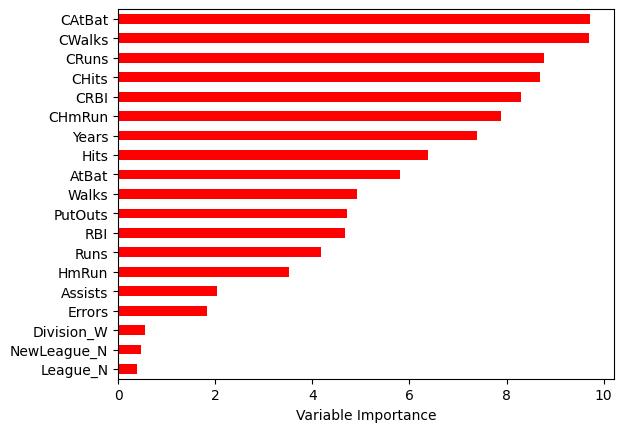

In [39]:
Importance = pd.DataFrame({"Importance":rf_tuned.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by="Importance",
                      axis=0,
                      ascending=True).plot(kind="barh",
                                          color="r")
plt.xlabel("Variable Importance")
plt.gca().legend_ = None